In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('heart.csv')

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
df.shape

(303, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


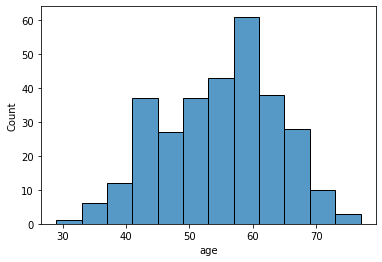

In [18]:
sns.histplot(df['age'])
plt.show()

# Analyize

In [24]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

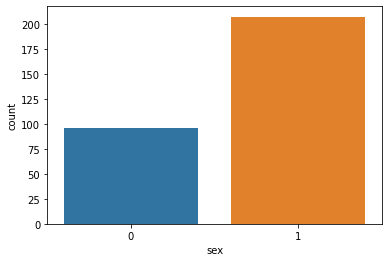

In [25]:
sns.countplot(x='sex',data=df)

<BarContainer object of 2 artists>

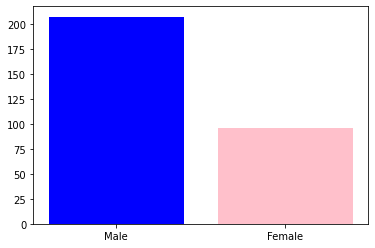

In [34]:
plt.bar(list(('Male','Female')),list(df['sex'].value_counts()),color=["blue","pink"])

<AxesSubplot:xlabel='target', ylabel='count'>

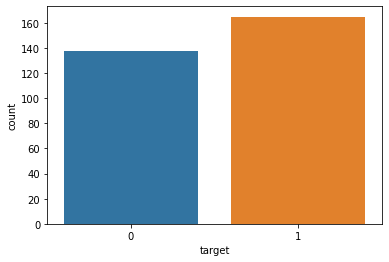

In [19]:
sns.countplot(x='target',data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

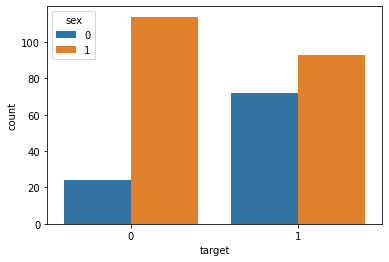

In [20]:
sns.countplot(x='target',hue='sex',data=df)

In [35]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

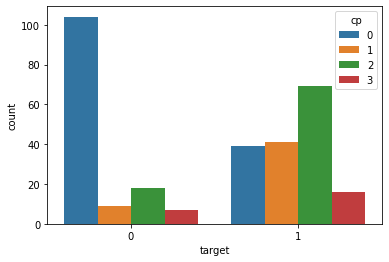

In [36]:
sns.countplot(x='target',hue='cp',data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

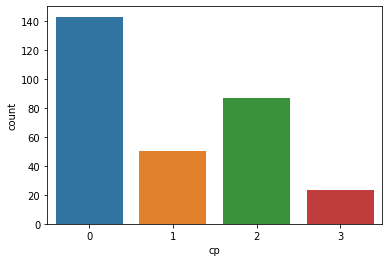

In [38]:
sns.countplot(x='cp',data=df)

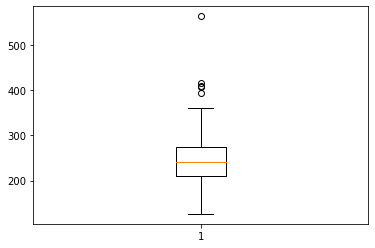

In [41]:
plt.boxplot(x='chol',data=df)
plt.show()

In [48]:
x = df[['age']]
y = df[['target']]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [51]:
from sklearn.naive_bayes import MultinomialNB

In [52]:
mnb=MultinomialNB()

In [53]:
mnb.fit(x_train,y_train)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [54]:
y_pred=mnb.predict(x_test)

In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,y_pred)

array([[ 0, 46],
       [ 0, 45]], dtype=int64)

In [57]:
45/(46+45)

0.4945054945054945

In [58]:
# multiple independent varriable
x = df[['age','trestbps','chol']]

In [60]:
x.head()

,age,trestbps,chol
0,63,145,233
1,37,130,250
2,41,130,204
3,56,120,236
4,57,120,354


In [61]:
y = df[['target']]

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [63]:
from sklearn.naive_bayes import GaussianNB

In [64]:
gnb = GaussianNB()

In [65]:
gnb.fit(x_train,y_train)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [66]:
y_pred=gnb.predict(x_test)

In [67]:
confusion_matrix(y_test,y_pred)

array([[20, 25],
       [18, 37]], dtype=int64)

In [68]:
(20+37)/(20+37+18+25)

0.57